In [49]:
import glob, os
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import matplotlib as mpl
from astropy import units as u
import time

In [50]:
import matplotlib as mpl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 200
plt.rc('font', family='serif')

In [51]:
imlist = sorted(glob.glob('../boao/C*com_mp.fits'))
imlist

['../boao/Calib-BOAO-GRB221009A-20221018-120733-J-1260.com_mp.fits',
 '../boao/Calib-BOAO-GRB221009A-20221018-121958-Ks-1260.com_mp.fits',
 '../boao/Calib-BOAO-GRB221009A-20221019-094213-Ks-840.com_mp.fits',
 '../boao/Calib-BOAO-GRB221009A-20221019-100148-J-840.com_mp.fits',
 '../boao/Calib-BOAO-GRB221009A-20221020-094343-Ks-1680.com_mp.fits',
 '../boao/Calib-BOAO-GRB221009A-20221022-093933-Ks-1680.com_mp.fits']

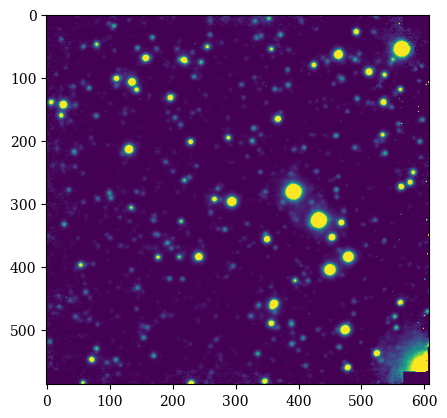

In [52]:
inim = imlist[0]
data, hdr = fits.getdata(inim, header = True)
xshp, yshp = data.shape
bkg = np.median(data.flatten())
plt.imshow(data, vmin=bkg, vmax=bkg*1000)

In [53]:
cutsize = 50
tdata = data[0+cutsize:yshp-cutsize, 0+cutsize:xshp-cutsize]
tbkg = np.median(tdata.flatten())
txshp, tyshp = tdata.shape

print(f"xshape : {xshp} --> {txshp}")
print(f"yshape : {yshp} --> {tyshp}")

xshape : 587 --> 508
yshape : 608 --> 487


(586.5, -0.5)

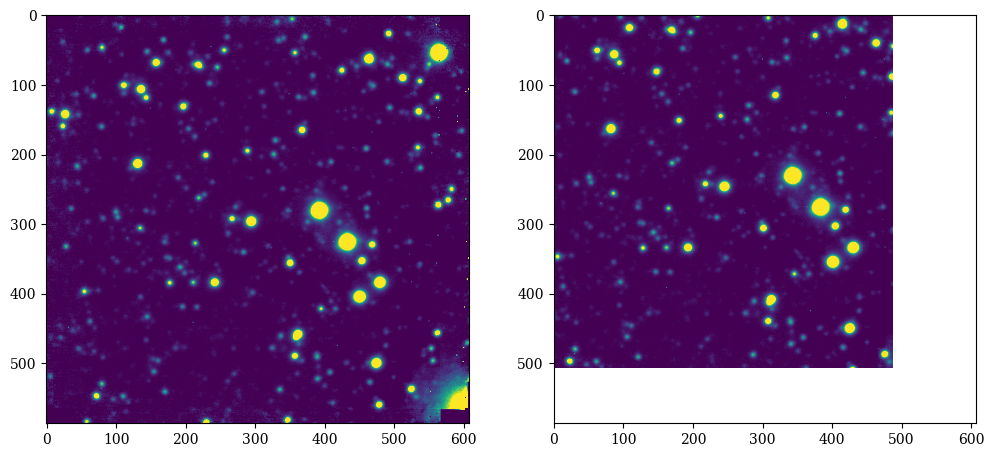

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data, vmin=bkg, vmax=bkg*1000)
xl, xr = plt.xlim()
yl, yu = plt.ylim()
plt.subplot(122)
plt.imshow(tdata, vmin=bkg, vmax=bkg*1000)
plt.xlim([xl, xr])
plt.ylim([yl, yu])


In [55]:
cutsize = 50

for inim in imlist:
	data, hdr = fits.getdata(inim, header = True)
	xshp, yshp = data.shape
	#
	tdata = data[0+cutsize:yshp-cutsize, 0+cutsize:xshp-cutsize]

	print(inim)
	print(f"xshape : {xshp} --> {txshp}")
	print(f"yshape : {yshp} --> {tyshp}")

	fits.writeto(f"{os.path.dirname(inim)}/trim{os.path.basename(inim)}", data=tdata, header=hdr, overwrite=True)

../boao/Calib-BOAO-GRB221009A-20221018-120733-J-1260.com_mp.fits
xshape : 587 --> 508
yshape : 608 --> 487
../boao/Calib-BOAO-GRB221009A-20221018-121958-Ks-1260.com_mp.fits
xshape : 585 --> 508
yshape : 605 --> 487
../boao/Calib-BOAO-GRB221009A-20221019-094213-Ks-840.com_mp.fits
xshape : 583 --> 508
yshape : 601 --> 487
../boao/Calib-BOAO-GRB221009A-20221019-100148-J-840.com_mp.fits
xshape : 616 --> 508
yshape : 604 --> 487
../boao/Calib-BOAO-GRB221009A-20221020-094343-Ks-1680.com_mp.fits
xshape : 590 --> 508
yshape : 597 --> 487
../boao/Calib-BOAO-GRB221009A-20221022-093933-Ks-1680.com_mp.fits
xshape : 602 --> 508
yshape : 638 --> 487
